In [1]:
#导入读数据的模块
import numpy as np
import pandas as pd

In [2]:
#读数据
dataSet = pd.read_csv('train.csv')

In [3]:
#看一下数据的构成
dataSet.head()

,id,heartbeat_signals,label
0,0,"0.9912297987616655,0.9435330436439665,0.764677...",0.0
1,1,"0.9714822034884503,0.9289687459588268,0.572932...",0.0
2,2,"1.0,0.9591487564065292,0.7013782792997189,0.23...",2.0
3,3,"0.9757952826275774,0.9340884687738161,0.659636...",0.0
4,4,"0.0,0.055816398940721094,0.26129357194994196,0...",2.0


数据包含三列，id，heartbeat_signals和label。
其中id列为标号，对分类没用，label为各样本的标签，分为0、1、2、3四类。
所以可用于训练的特征只有heartbeat_signals，
通过观察可以得出，每条记录的heartbeat_signals包含205个心跳信号，可以对数据进行处理，将每个心跳信号作为一个特征

In [4]:
# 简单预处理
dataSet_list = []

for items in dataSet.values:
    dataSet_list.append([items[0]] + [float(i) for i in items[1].split(',')] + [items[2]])

dataSet = pd.DataFrame(np.array(dataSet_list))
dataSet.columns = ['id'] + ['s_'+str(i) for i in range(len(dataSet_list[0])-2)] + ['label']
dataSet

,id,s_0,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,...,s_196,s_197,s_198,s_199,s_200,s_201,s_202,s_203,s_204,label
0,0.0,0.991230,0.943533,0.764677,0.618571,0.379632,0.190822,0.040237,0.025995,0.031709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.971482,0.928969,0.572933,0.178457,0.122962,0.132360,0.094392,0.089575,0.030481,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,1.000000,0.959149,0.701378,0.231778,0.000000,0.080698,0.128376,0.187448,0.280826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3.0,0.975795,0.934088,0.659637,0.249921,0.237116,0.281445,0.249921,0.249921,0.241397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.000000,0.055816,0.261294,0.359847,0.433143,0.453698,0.499004,0.542796,0.616904,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995.0,1.000000,0.677705,0.222392,0.257158,0.204690,0.054665,0.026152,0.118181,0.244838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,99996.0,0.926857,0.906347,0.636993,0.415038,0.374745,0.382581,0.358943,0.341359,0.336525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
99997,99997.0,0.925835,0.587384,0.633226,0.632353,0.639283,0.614292,0.599155,0.517632,0.403803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
99998,99998.0,1.000000,0.994762,0.829702,0.458193,0.264162,0.240228,0.213766,0.189291,0.203816,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


由上表可见将heartbeat_signals进行拆分后，由一个特征变为了205个心跳信号特征。

In [5]:
#看一下数据各类别的数目，是否有类别不平衡
dataSet['label'].value_counts()

0.0    64327
3.0    17912
2.0    14199
1.0     3562
Name: label, dtype: int64

存在类别不平衡，对样本少的类别可能会有影响，先选用简单的模型进行验证

In [6]:
#接着对数据进行划分，按照7：3的比例划分为训练集和测试集
labels = dataSet['label']
dataSet=dataSet.drop(['label'],axis=1)
dataSet = dataSet.drop(['id'],axis=1)
from sklearn.model_selection import train_test_split
# 数据集划分
X_train,X_test,y_train,y_test=train_test_split(dataSet,labels, random_state=2021, test_size=0.3)
# 打印划分后的数据集大小
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(70000, 205) (70000,) (30000, 205) (30000,)


选取模型，用于分类的模型包含：最简单的感知机、逻辑回归、svm和决策树等
本数据集由于进行了处理，将一维的heartbeat_signals拆分成了205个心跳信号特征，记录数为10万条，不适合经常用于小样本数据的svm
另一方面，本数据集为多分类，而非二分类且不能保证线性可分，所以不适合采用感知机和逻辑回归
最终选择决策树（使用集成树效果会更好，由于老师没有讲过，所以就不考虑了），简单易理解且效果不错

In [8]:
#构建模型
#普通决策树
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=2021)

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

para_dict ={'criterion':['entropy','gini'],'max_depth':[range(5,66,5)]}
for i in para_dict['criterion']:
    rfc = tree.DecisionTreeClassifier(criterion=i,random_state=2021)
    score = cross_val_score(rfc, X_train, y_train, cv=5).mean()
    print(i+":"+str(score))

entropy:0.9587714285714286
gini:0.9531285714285713


0.9023571428571427
0.9484857142857143
0.9587428571428571
0.9587285714285715
0.9587714285714286
0.9587714285714286
0.9587714285714286
0.9587714285714286
0.9587714285714286
0.9587714285714286
0.9587714285714286
0.9587714285714286
准确率最大为：0.9587714285714286
最优参数为：30


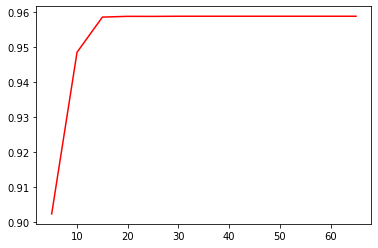

In [12]:
para_dict ={'criterion':['entropy','gini'],'max_depth':range(5,66,5)}
score_lt = []
for i in para_dict['max_depth']:
    rfc = tree.DecisionTreeClassifier(criterion='entropy',max_depth=i,random_state=2021)
    score = cross_val_score(rfc, X_train, y_train, cv=5).mean()
    score_lt.append(score)
    print(score)
score_max = max(score_lt)

# 绘制学习曲线
import matplotlib.pyplot as plt 
x = range(5,66,5)
print("准确率最大为："+str(score_max))
print("最优参数为："+str(x[score_lt.index(score_max)]))
plt.subplot(111)
plt.plot(x, score_lt, 'r-')
plt.show()

In [21]:
#接下来利用网格搜索法进行参数选择，以期获得更加优异的性能
from sklearn.model_selection import GridSearchCV
para_dict ={'criterion':['entropy','gini'],'max_depth':[10,20,50,80,100]}
gcv = GridSearchCV(estimator=clf ,param_grid=para_dict ,cv = 5)
gcv.fit(X_train,y_train)
print("Best parameters:{}".format(gcv.best_params_))
print("Best score on train set:{:.5f}".format(gcv.best_score_))

Best parameters:{'criterion': 'entropy', 'max_depth': 50}
Best score on train set:0.96


经过网格搜索，得到最佳参数为：criterion='entropy'，max_depth=50

In [13]:
#采用最优参数的决策树进行训练和预测
from sklearn.metrics import f1_score,recall_score,accuracy_score,classification_report
clf = tree.DecisionTreeClassifier(random_state=2021,criterion='entropy',max_depth=30)
clf1 = clf.fit(X_train,y_train)
#将训练好的决策树可视化
from sklearn.tree import export_graphviz
feature_names = np.array(dataSet.columns).tolist()
class_names = ['0','1','2','3']
export_graphviz(
        clf1,
        out_file="tree.dot",
        feature_names=feature_names,
        class_names=class_names,
        rounded=True,
        filled=True
    )
print(classification_report(y_test,clf1.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97     19291
         1.0       0.77      0.79      0.78      1082
         2.0       0.94      0.95      0.94      4289
         3.0       0.97      0.98      0.98      5338

    accuracy                           0.96     30000
   macro avg       0.91      0.92      0.92     30000
weighted avg       0.96      0.96      0.96     30000



上面的结果显示：在测试集上的准确率为0.96；
除1类别之外，其它类别的精度（precision）、召回率（recall）与f1-score分数都超过了0.9；
同时也验证了上面类别不平衡会对结果产生影响啊。
针对结果进行改进，主要有以下两个方面：
1.再次观察数据结合相关知识，每个心跳信号之间是存在时序关系的，可以对数据加入时间步特征，并对其进行特征处理
2.对于类别不平衡问题的解决方法，使用集成方法如bagging或boosting进行训练，这里分别采用随机森林和lightGBM。

In [9]:
#时间序列处理
dataSet = pd.read_csv('train.csv')#重新读入数据

In [10]:
# 对心电特征进行行转列处理，同时为每个心电信号加入时间步特征time
heartbeat_df = dataSet["heartbeat_signals"].str.split(",", expand=True).stack()
heartbeat_df = heartbeat_df.reset_index()
heartbeat_df = heartbeat_df.set_index("level_0")
heartbeat_df.index.name = None
heartbeat_df.rename(columns={"level_1":"time", 0:"heartbeat_signals"}, inplace=True)
heartbeat_df["heartbeat_signals"] = heartbeat_df["heartbeat_signals"].astype(float)

heartbeat_df

,time,heartbeat_signals
0,0,0.991230
0,1,0.943533
0,2,0.764677
0,3,0.618571
0,4,0.379632
...,...,...
99999,200,0.000000
99999,201,0.000000
99999,202,0.000000
99999,203,0.000000


In [11]:
# 将处理后的心电特征加入到数据中，同时将训练数据label列单独存储
labels = dataSet["label"]
dataSet = dataSet.drop("label", axis=1)
dataSet = dataSet.drop("heartbeat_signals", axis=1)
dataSet = dataSet.join(heartbeat_df)

dataSet

,id,time,heartbeat_signals
0,0,0,0.991230
0,0,1,0.943533
0,0,2,0.764677
0,0,3,0.618571
0,0,4,0.379632
...,...,...,...
99999,99999,200,0.000000
99999,99999,201,0.000000
99999,99999,202,0.000000
99999,99999,203,0.000000


In [12]:
from tsfresh import extract_features

# 特征提取
features = extract_features(dataSet, column_id='id', column_sort='time')
features

Feature Extraction: 100%|██████████| 20/20 [54:18<00:00, 162.94s/it]


,heartbeat_signals__variance_larger_than_standard_deviation,heartbeat_signals__has_duplicate_max,heartbeat_signals__has_duplicate_min,heartbeat_signals__has_duplicate,heartbeat_signals__sum_values,heartbeat_signals__abs_energy,heartbeat_signals__mean_abs_change,heartbeat_signals__mean_change,heartbeat_signals__mean_second_derivative_central,heartbeat_signals__median,...,heartbeat_signals__permutation_entropy__dimension_5__tau_1,heartbeat_signals__permutation_entropy__dimension_6__tau_1,heartbeat_signals__permutation_entropy__dimension_7__tau_1,heartbeat_signals__query_similarity_count__query_None__threshold_0.0,"heartbeat_signals__matrix_profile__feature_""min""__threshold_0.98","heartbeat_signals__matrix_profile__feature_""max""__threshold_0.98","heartbeat_signals__matrix_profile__feature_""mean""__threshold_0.98","heartbeat_signals__matrix_profile__feature_""median""__threshold_0.98","heartbeat_signals__matrix_profile__feature_""25""__threshold_0.98","heartbeat_signals__matrix_profile__feature_""75""__threshold_0.98"
0,0.0,0.0,1.0,1.0,38.927945,18.216197,0.019894,-0.004859,0.000117,0.125531,...,2.184420,2.500658,2.722686,NaN,6.445546,12.165525,10.246524,10.746992,8.388625,11.484910
1,0.0,0.0,1.0,1.0,19.445634,7.705092,0.019952,-0.004762,0.000105,0.030481,...,2.710933,3.065802,3.224835,NaN,3.209140,12.649111,9.031069,9.437545,6.723180,12.094899
2,0.0,0.0,1.0,1.0,21.192974,9.140423,0.009863,-0.004902,0.000101,0.000000,...,1.263370,1.406001,1.509478,NaN,3.054539,8.246211,7.370478,8.246211,5.966122,8.246211
3,0.0,0.0,1.0,1.0,42.113066,15.757623,0.018743,-0.004783,0.000103,0.241397,...,2.986728,3.534354,3.854177,NaN,3.010557,9.797959,6.331360,6.406440,5.266743,7.091706
4,0.0,0.0,1.0,1.0,69.756786,51.229616,0.014514,0.000000,-0.000137,0.000000,...,1.914511,2.165627,2.323993,NaN,9.181236,13.429784,9.959913,9.516290,9.286013,10.270925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,1.0,1.0,63.323449,28.742238,0.023588,-0.004902,0.000794,0.388402,...,2.873602,3.391830,3.679969,NaN,2.436377,9.591663,5.635231,6.366205,3.596982,7.033638
99996,0.0,0.0,1.0,1.0,69.657534,31.866323,0.017373,-0.004543,0.000051,0.421138,...,3.085504,3.728881,4.095457,NaN,1.415410,7.483315,2.893592,2.684349,2.049241,3.334109
99997,0.0,0.0,1.0,1.0,40.897057,16.412857,0.019470,-0.004538,0.000834,0.213306,...,2.601062,2.996962,3.293562,NaN,5.748652,12.165525,8.524637,7.983410,7.062217,10.081756
99998,0.0,0.0,1.0,1.0,42.333303,14.281281,0.017032,-0.004902,0.000013,0.264974,...,3.236950,3.793512,4.018302,NaN,2.346822,8.246211,4.951374,4.727535,4.069786,5.615282


In [13]:
from tsfresh.utilities.dataframe_functions import impute

# 去除抽取特征中的NaN值
impute(features)

/home/admin/.local/lib/python3.6/site-packages/tsfresh/utilities/dataframe_functions.py:172: RuntimeWarning: The columns ['heartbeat_signals__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  df.iloc[:, np.where(is_col_non_finite)[0]].columns.values), RuntimeWarning)


,heartbeat_signals__variance_larger_than_standard_deviation,heartbeat_signals__has_duplicate_max,heartbeat_signals__has_duplicate_min,heartbeat_signals__has_duplicate,heartbeat_signals__sum_values,heartbeat_signals__abs_energy,heartbeat_signals__mean_abs_change,heartbeat_signals__mean_change,heartbeat_signals__mean_second_derivative_central,heartbeat_signals__median,...,heartbeat_signals__permutation_entropy__dimension_5__tau_1,heartbeat_signals__permutation_entropy__dimension_6__tau_1,heartbeat_signals__permutation_entropy__dimension_7__tau_1,heartbeat_signals__query_similarity_count__query_None__threshold_0.0,"heartbeat_signals__matrix_profile__feature_""min""__threshold_0.98","heartbeat_signals__matrix_profile__feature_""max""__threshold_0.98","heartbeat_signals__matrix_profile__feature_""mean""__threshold_0.98","heartbeat_signals__matrix_profile__feature_""median""__threshold_0.98","heartbeat_signals__matrix_profile__feature_""25""__threshold_0.98","heartbeat_signals__matrix_profile__feature_""75""__threshold_0.98"
0,0.0,0.0,1.0,1.0,38.927945,18.216197,0.019894,-0.004859,0.000117,0.125531,...,2.184420,2.500658,2.722686,0.0,6.445546,12.165525,10.246524,10.746992,8.388625,11.484910
1,0.0,0.0,1.0,1.0,19.445634,7.705092,0.019952,-0.004762,0.000105,0.030481,...,2.710933,3.065802,3.224835,0.0,3.209140,12.649111,9.031069,9.437545,6.723180,12.094899
2,0.0,0.0,1.0,1.0,21.192974,9.140423,0.009863,-0.004902,0.000101,0.000000,...,1.263370,1.406001,1.509478,0.0,3.054539,8.246211,7.370478,8.246211,5.966122,8.246211
3,0.0,0.0,1.0,1.0,42.113066,15.757623,0.018743,-0.004783,0.000103,0.241397,...,2.986728,3.534354,3.854177,0.0,3.010557,9.797959,6.331360,6.406440,5.266743,7.091706
4,0.0,0.0,1.0,1.0,69.756786,51.229616,0.014514,0.000000,-0.000137,0.000000,...,1.914511,2.165627,2.323993,0.0,9.181236,13.429784,9.959913,9.516290,9.286013,10.270925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,1.0,1.0,63.323449,28.742238,0.023588,-0.004902,0.000794,0.388402,...,2.873602,3.391830,3.679969,0.0,2.436377,9.591663,5.635231,6.366205,3.596982,7.033638
99996,0.0,0.0,1.0,1.0,69.657534,31.866323,0.017373,-0.004543,0.000051,0.421138,...,3.085504,3.728881,4.095457,0.0,1.415410,7.483315,2.893592,2.684349,2.049241,3.334109
99997,0.0,0.0,1.0,1.0,40.897057,16.412857,0.019470,-0.004538,0.000834,0.213306,...,2.601062,2.996962,3.293562,0.0,5.748652,12.165525,8.524637,7.983410,7.062217,10.081756
99998,0.0,0.0,1.0,1.0,42.333303,14.281281,0.017032,-0.004902,0.000013,0.264974,...,3.236950,3.793512,4.018302,0.0,2.346822,8.246211,4.951374,4.727535,4.069786,5.615282


In [14]:
from tsfresh import select_features

# 按照特征和数据label之间的相关性进行特征选择
features_filtered = select_features(features, labels)
features_filtered

,heartbeat_signals__sum_values,"heartbeat_signals__fft_coefficient__attr_""abs""__coeff_38","heartbeat_signals__fft_coefficient__attr_""abs""__coeff_37","heartbeat_signals__fft_coefficient__attr_""abs""__coeff_36","heartbeat_signals__fft_coefficient__attr_""abs""__coeff_35","heartbeat_signals__fft_coefficient__attr_""abs""__coeff_34","heartbeat_signals__fft_coefficient__attr_""abs""__coeff_33","heartbeat_signals__fft_coefficient__attr_""abs""__coeff_32","heartbeat_signals__fft_coefficient__attr_""abs""__coeff_31","heartbeat_signals__fft_coefficient__attr_""abs""__coeff_30",...,"heartbeat_signals__fft_coefficient__attr_""abs""__coeff_84","heartbeat_signals__fft_coefficient__attr_""imag""__coeff_97","heartbeat_signals__fft_coefficient__attr_""abs""__coeff_90","heartbeat_signals__fft_coefficient__attr_""abs""__coeff_94","heartbeat_signals__fft_coefficient__attr_""abs""__coeff_92","heartbeat_signals__fft_coefficient__attr_""real""__coeff_97","heartbeat_signals__fft_coefficient__attr_""abs""__coeff_75","heartbeat_signals__fft_coefficient__attr_""real""__coeff_88","heartbeat_signals__fft_coefficient__attr_""real""__coeff_92","heartbeat_signals__fft_coefficient__attr_""real""__coeff_83"
0,38.927945,0.660949,1.090709,0.848728,1.168685,0.982133,1.223496,1.236300,1.104172,1.497129,...,0.531883,-0.047438,0.554370,0.307586,0.564596,0.562960,0.591859,0.504124,0.528450,0.473568
1,19.445634,1.718217,1.280923,1.850706,1.460752,1.924501,1.925485,1.715938,2.079957,1.818636,...,0.563590,-0.109579,0.697446,0.398073,0.640969,0.270192,0.224925,0.645082,0.635135,0.297325
2,21.192974,1.814281,1.619051,1.215343,1.787166,2.146987,1.686190,1.540137,2.291031,2.403422,...,0.712487,-0.074042,0.321703,0.390386,0.716929,0.316524,0.422077,0.722742,0.680590,0.383754
3,42.113066,2.109550,0.619634,2.366413,2.071539,1.000340,2.728281,1.391727,2.017176,2.610492,...,0.601499,-0.184248,0.564669,0.623353,0.466980,0.651774,0.308915,0.550097,0.466904,0.494024
4,69.756786,0.194549,0.348882,0.092119,0.653924,0.231422,1.080003,0.711244,1.357904,1.237998,...,0.015292,0.070505,0.065835,0.051780,0.092940,0.103773,0.179405,-0.089611,0.091841,0.056867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,63.323449,0.840651,1.186210,1.396236,0.417221,2.036034,1.659054,0.500584,1.693545,0.859932,...,0.779955,0.005525,0.486013,0.273372,0.705386,0.602898,0.447929,0.474844,0.564266,0.133969
99996,69.657534,1.557787,1.393960,0.989147,1.611333,1.793044,1.092325,0.507138,1.763940,2.677643,...,0.539489,0.114670,0.579498,0.417226,0.270110,0.556596,0.703258,0.462312,0.269719,0.539236
99997,40.897057,0.469758,1.000355,0.706395,1.190514,0.674603,1.632769,0.229008,2.027802,0.302457,...,0.282597,-0.474629,0.460647,0.478341,0.527891,0.904111,0.728529,0.178410,0.500813,0.773985
99998,42.333303,0.992948,1.354894,2.238589,1.237608,1.325212,2.785515,1.918571,0.814167,2.613950,...,0.594252,-0.162106,0.694276,0.681025,0.357196,0.498088,0.433297,0.406154,0.324771,0.340727


In [1]:
dataSet = pd.read_csv('train_xx.csv')

NameError: name 'pd' is not defined

In [15]:
# 数据集划分
X_train,X_test,y_train,y_test=train_test_split(dataSet,labels, random_state=2021, test_size=0.3)
# 打印划分后的数据集大小
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(70000, 707) (70000,) (30000, 707) (30000,)


In [16]:
#接下来利用网格搜索法进行参数选择，以期获得更加优异的性能
from sklearn.model_selection import GridSearchCV
para_dict ={'criterion':['entropy','gini'],'max_depth':range(5,66,5)}
gcv = GridSearchCV(estimator=clf ,param_grid=para_dict ,cv = 5)
gcv.fit(X_train,y_train)
print("Best parameters:{}".format(gcv.best_params_))
print("Best score on train set:{:.5f}".format(gcv.best_score_))

Best parameters:{'criterion': 'entropy', 'max_depth': 15}
Best score on train set:0.96589


In [17]:
#用决策树试试
#采用最优参数的决策树进行训练和预测
from sklearn.metrics import f1_score,recall_score,accuracy_score,classification_report
clf = tree.DecisionTreeClassifier(random_state=2021,criterion='entropy',max_depth=15)
clf1 = clf.fit(X_train,y_train)
print(classification_report(y_test,clf1.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     19291
         1.0       0.85      0.75      0.80      1082
         2.0       0.95      0.94      0.95      4289
         3.0       0.98      0.97      0.97      5338

    accuracy                           0.97     30000
   macro avg       0.94      0.91      0.92     30000
weighted avg       0.97      0.97      0.97     30000




构建lightGBM

In [19]:
import lightgbm as lgb
def lg():
    train_data = lgb.Dataset(X_train, label=y_train)
    validation_data = lgb.Dataset(X_test, label=y_test)

# 参数
    params = {
        'boosting_type': 'goss',
        'learning_rate': 0.01,
        'lambda_l1': 0.1,
        'lambda_l2': 0.2,
        'objective': 'multiclass', 
        'num_class': 4,
    }

    # 模型训练
    gbm = lgb.train(params, train_data, valid_sets=[validation_data],
                    num_boost_round=1000,
                    verbose_eval=100, 
                    early_stopping_rounds=200)

    # 模型预测
    y_pred = gbm.predict(X_test)
    y_pred = [list(x).index(max(x)) for x in y_pred]
    
    #print(y_pred)
    
    # 模型评估
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test,y_pred))
lg()

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.146125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 168867
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 707
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score -0.441033
[LightGBM] [Info] Start training from score -3.340237
[LightGBM] [Info] Start training from score -1.954951
[LightGBM] [Info] Start training from score -1.716864
Training until validation scores don't improve for 200 rounds
[100]	valid_0's multi_logloss: 0.247598
[200]	valid_0's multi_logloss: 0.112557
[300]	valid_0's multi_logloss: 0.070447
[400]	valid_0's multi_logloss: 0.0551458
[500]	valid_0's multi_logloss: 0.0479357
[600]	valid_0's multi_logloss: 0.0439406
[700]	valid_0's multi_logloss: 0.0415352
[800]	valid_0's multi_logloss: 0.0399759
[900]	valid_0's multi_logloss: 0.0389815
[1000]	valid_0's multi_logloss: 